In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
dataset = pd.read_csv('conversion_data.csv')
dataset.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [34]:
#dataset1 = dataset[dataset["converted"]==1]
#dataset0 = dataset[dataset["converted"]==0].sample(20000)
#dataset = pd.concat([dataset0,dataset1])
dataset = dataset[dataset.age <50]
dataset = dataset[dataset.total_pages_visited < 25]
dataset.converted.value_counts()

0    299952
1     10101
Name: converted, dtype: int64

In [4]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,29731.000000,29731.000000,29731.000000,29731.000000
mean,28.954055,0.564529,7.910127,0.339746
std,7.607822,0.495827,5.700502,0.473631
min,17.000000,0.000000,1.000000,0.000000
25%,23.000000,0.000000,3.000000,0.000000
50%,28.000000,1.000000,6.000000,0.000000
75%,34.000000,1.000000,12.000000,1.000000
max,49.000000,1.000000,24.000000,1.000000


In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

In [0]:
X = pd.get_dummies(X, drop_first = True)

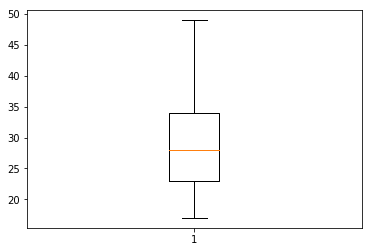

In [7]:
plt.boxplot(X.age)
plt.show()

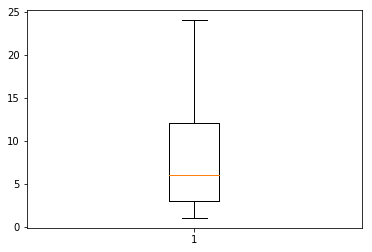

In [8]:
plt.boxplot(X.total_pages_visited)
plt.show()

In [24]:
dataset.converted.value_counts()

0    19630
1    10101
Name: converted, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.3,                                                 
                                                   random_state = 6)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.linear_model import Lasso
lasso_small = Lasso(alpha = 0.01).fit(X_train,y_train)
#lasso_small.fit(X_train, y_train)
lasso_med = Lasso(alpha = 10).fit(X_train,y_train)
#lasso_med.fit(X_train, y_train)
lasso_large = Lasso(alpha = 100).fit(X_train,y_train)
#lasso_large.fit(X_train, y_train)

In [12]:
score_small = lasso_small.score(X_test,y_test)
score_med = lasso_med.score(X_test,y_test)
score_large = lasso_large.score(X_test,y_test)
print('Le score avec alpha = 0.01 : {}'.format(score_small))
print('Le score avec alpha = 10 : {}'.format(score_med))
print('Le score avec alpha = 100 : {}'.format(score_large))

Le score avec alpha = 0.01 : 0.7049480745954153
Le score avec alpha = 10 : -3.527104866773989e-05
Le score avec alpha = 100 : -3.527104866773989e-05


# Alpha 0.01
##### possède le meilleur score donc GridSearchCV dans ces alentours

In [0]:
from sklearn.model_selection import GridSearchCV
params = {'alpha' : np.arange(0.0001,0.001,0.0001)}
lasso = Lasso()
grid = GridSearchCV(estimator = lasso, param_grid = params, cv = 10)
grid_fit = grid.fit(X_train,y_train)

In [14]:
grid_fit.best_params_

{'alpha': 0.0001}

In [15]:
grid_fit.best_estimator_.score(X_test, y_test)

0.7094590221620249

### Meilleur Alpha = 0.0003
### Score = 0.715

# Test d'une regression logistique & ROC

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


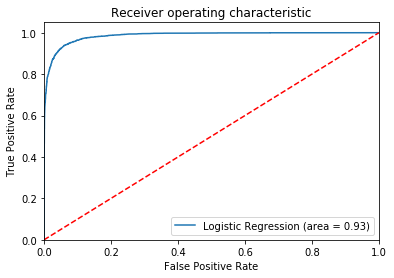

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [18]:
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
204826,40,1,1,0,1,0,1,0
137392,20,1,4,0,0,1,0,1
115701,22,1,3,0,0,0,1,0
214254,40,1,6,0,0,1,0,1
28827,36,1,3,0,0,1,0,0


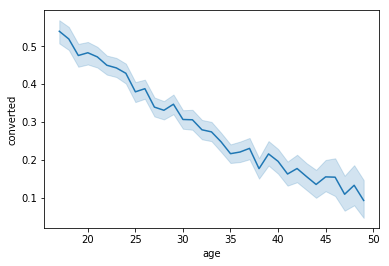

In [19]:
sns.lineplot(x = dataset.age, y = dataset.converted)

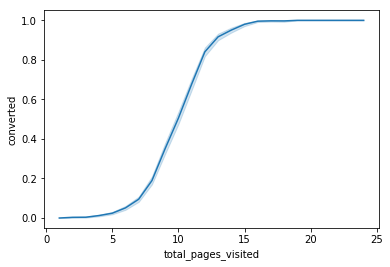

In [20]:
sns.lineplot(x = dataset.total_pages_visited, y = dataset.converted)

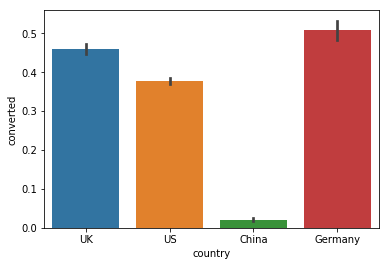

In [23]:
sns.barplot(x = dataset.country, y = dataset.converted)